# week4授業前課題２　住宅価格の予測
## 住宅価格の回帰
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

House Prices: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト
* 分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# 回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

### 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。




In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [84]:
df = pd.read_csv('C:/Users/miyas/kaggle/train.csv')
X = np.array([df.GrLivArea,df.YearBuilt]).T
y = df.SalePrice.values
X.shape,y.shape

((1460, 2), (1460,))

In [85]:
mini_df = df.loc[:,['GrLivArea','YearBuilt','SalePrice']]
mini_df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。
sklearn.linear_model.LinearRegression — https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。                     
sklearn.metrics.mean_squared_error — https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html   
**MSE** : 値が小さければ小さいほど，良い．                     
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### メモ：標準偏回帰係数
標準偏回帰係数は、説明変数および目的変数をそれぞれ標準化した値から算出される偏回帰係数のことです。標準偏回帰係数は重回帰式における各変数の重要性を表す指標であり、標準化偏回帰係数どうしの大小を比較できます。

In [86]:
mini_df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [87]:
mini_df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

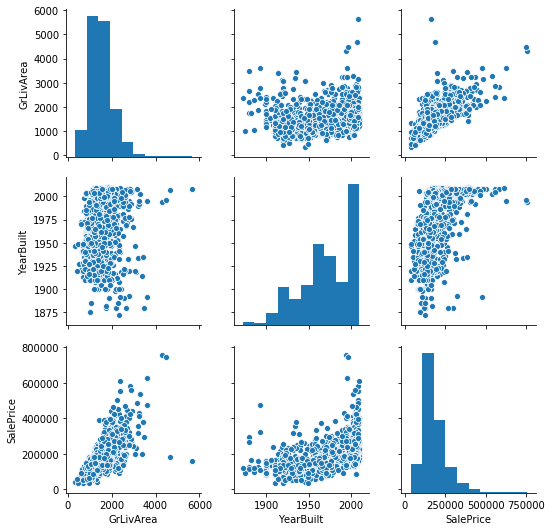

In [88]:
sns.pairplot(mini_df)

分布の偏りが大きい．SalePriceとGrLivAreaには，がっつり外れ値がある．                 
### 正規化について
* ほとんどの値が１～10の値の中に，1つだけ1000が含まれている場合                       
MinMaxScalerを使うと，ほとんどの値が０になってしまうので，StandardScalerのほうが良い．             
または，外れ値を除去する

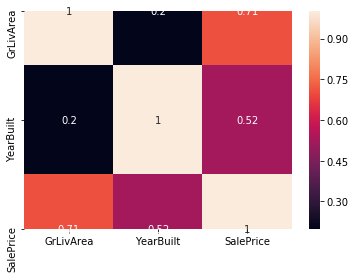

In [89]:
#相関関係の確認
corr_train = mini_df.corr()
sns.heatmap(corr_train,annot=True)

２特徴量とも，目的変数との相関が高く，多重共線性はない．特徴量としてよさそう

In [90]:
#データセットを学習用、検証用と分ける
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=0)
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_std = sc_y.transform(y_train)
y_val_std = sc_y.transform(y_val)

X_train_std.shape,X_val_std.shape,y_train_std.shape,y_val_std.shape

((1095, 2), (365, 2), (1095, 1), (365, 1))

In [91]:
#初期化
lr = LinearRegression()
#学習
lr.fit(X_train_std,y_train_std)
#推定
y_pred_lr = lr.predict(X_val_std)
#評価
mse_lr = mean_squared_error(y_val_std,y_pred_lr)
mse_lr

0.4390768488944987

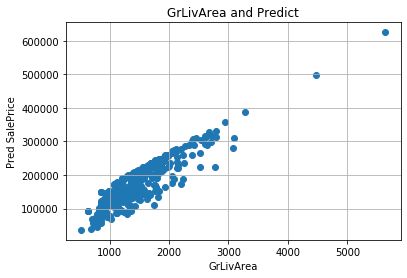

In [92]:
#標準化された形で出てくるpredictをもとに戻す．
pred_inv_lr = sc_y.inverse_transform(y_pred_lr)

# GrLivAreaとS予測SalePriceを可視化
plt.scatter(X_val[:,0],pred_inv_lr)
plt.title('GrLivArea and Predict')
plt.xlabel('GrLivArea')
plt.ylabel('Pred SalePrice')
plt.grid()

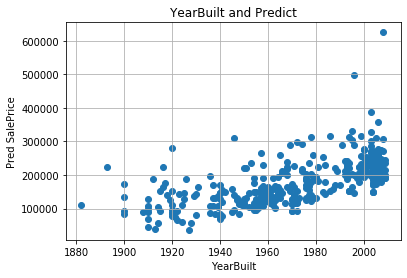

In [93]:
#標準化された形で出てくるpredictをもとに戻す．
pred_inv_lr = sc_y.inverse_transform(y_pred_lr)

# YearBuiltと予測したSalePriceを可視化
plt.scatter(X_val[:,1],pred_inv_lr)
plt.title('YearBuilt and Predict')
plt.xlabel('YearBuilt')
plt.ylabel('Pred SalePrice')
plt.grid()

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト
                
本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。                    
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



In [94]:
def my_fit_predict(model):
    """学習・推定して，predictとMSEを返す関数"""
    model.fit(X_train_std,y_train_std)
    y_pred_train = model.predict(X_train_std).reshape(-1,1)
    y_pred_val = model.predict(X_val_std).reshape(-1,1)
    mse = mean_squared_error(y_val_std,y_pred_val)
    return y_pred_train, y_pred_val,mse

In [95]:
def Residual_Plot(y_train_pred,y_val_pred):
    """残差をplotする関数"""
    plt.scatter(y_train_pred,y_train_pred - y_train_std, color = 'red',label='train') # trainの残差をプロット 
    plt.scatter(y_val_pred,y_val_pred - y_val_std, color = 'blue',label='test')      # testの残差をプロット 
    plt.hlines(y=0, xmin=-2,xmax=4,color = 'black') # 残差0の線
    plt.title('Residual Plot')# 図のタイトル                     
    plt.xlabel('Predicted Values') # x軸のラベル
    plt.ylabel('Residuals') # y軸のラベル
    plt.grid() # グリッド線を表示
    plt.legend()
    plt.show()    

In [96]:
def pred_plot(y_pred):
    """特徴量と予測値の関係をplotする関数"""
    X_name = ['GrLivArea','YearBuilt']
    for i in range(2):
        pred_inverse = sc_y.inverse_transform(y_pred)#標準化されたpredをもとのスケールに戻す
        plt.scatter(X_val[:,i],pred_inverse)#特徴量をＸ，predictをy
        plt.xlabel(X_name[i])
        plt.ylabel('Predict')
        plt.grid()
        plt.show()

## SVR
sklearn.svm.SVR — https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html  

In [97]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

SVRのkernelをグリッドサーチしてみる

In [98]:
# パラメータ
params = {'kernel':['linear','poly','rbf','sigmoid']}

# インスタンス化
svr = SVR()
gs = GridSearchCV(estimator=svr,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv=3)
# 学習
gs.fit(X_train_std,y_train_std)

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [99]:
# 結果
print('ベストスコア：',gs.best_score_)
print('パラメータ：',gs.best_params_)

ベストスコア： -0.3143029119996547
パラメータ： {'kernel': 'rbf'}


kernelはrbfがいいみたい．

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


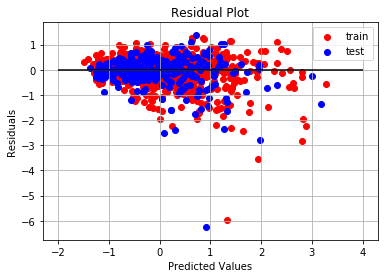

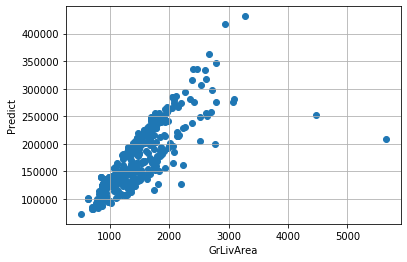

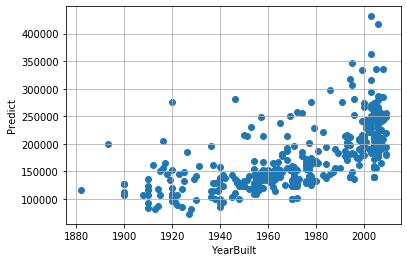

In [100]:
svr = SVR(kernel='rbf')
y_pred_svr_t, y_pred_svr_v,mse_svr = my_fit_predict(svr)
Residual_Plot(y_pred_svr_t,y_pred_svr_v)
pred_plot(y_pred_svr_v)

## 決定木
sklearn.tree.DecisionTreeRegressor — https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 

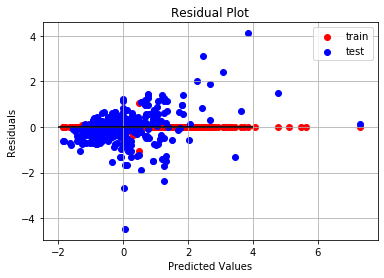

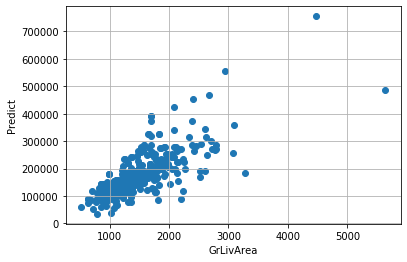

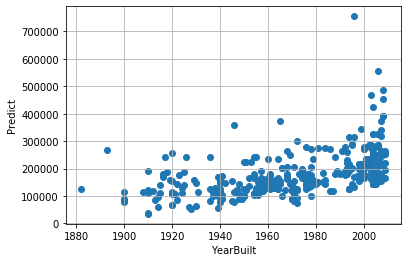

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
y_pred_tree_t, y_pred_tree_v,mse_tree = my_fit_predict(tree)
Residual_Plot(y_pred_tree_t,y_pred_tree_v)
pred_plot(y_pred_tree_v)

決定木の学習用データでの予測値は，ほぼ残差0

## ランダムフォレスト
sklearn.ensemble.RandomForestRegressor — https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html     

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


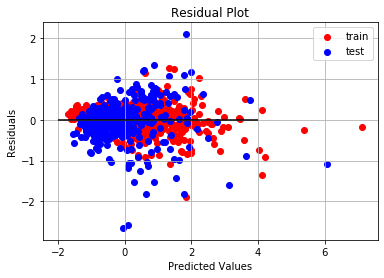

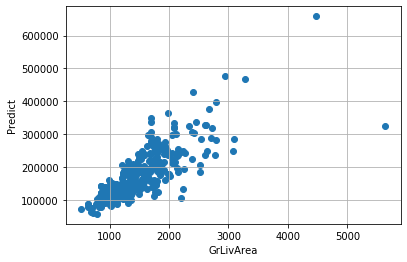

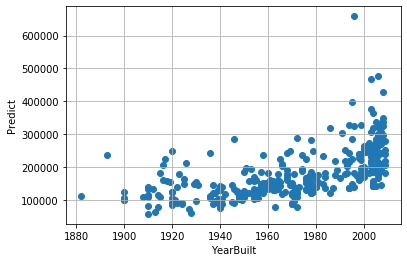

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
y_pred_rfr_t,y_pred_rfr_v,mse_rfr = my_fit_predict(rfr)
Residual_Plot(y_pred_rfr_t,y_pred_rfr_v)
pred_plot(y_pred_rfr_v)

In [103]:
mse_list = {'LinearRegression':[mse_lr],'SVR':[mse_svr],'DecisionTreeRegressor':[mse_tree],'RandomForestRegressor':[mse_rfr]}
pd.DataFrame(mse_list,index=['Mean Squared Error']).T

,Mean Squared Error
LinearRegression,0.439077
SVR,0.369142
DecisionTreeRegressor,0.506251
RandomForestRegressor,0.270357


MSEの値を見ると，RandomForestRegressorが最もMSEが小さく，当てはまりが良い．              
DecisionTreeRegressorの残差plotを見ると，完全にtrainに過学習している．               
同じ決定木系でも，複数の決定木の多数決であるRandomForestRegressorの方が，精度が良いようだ．              
GrLiveAreaは，予測値（SalePrice）ときれいな正の相関で，GrLiveAreaが広くなれば，SalePriceは上がると予測されている．               
YearBuiltも正の相関があるように見え，建設年が新しいほど，SalePriceは高くなると予測されている．            
